In [1]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D,Dense,Dropout
from tensorflow.keras.models  import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
import matplotlib.pyplot as plt
def plot_imgs(item_dir, top=10):
    all_item_dirs = os.listdir(item_dir)
    item_files = [os.path.join(item_dir, file) for file in all_item_dirs][:5]
  
    plt.figure(figsize=(10, 10))
  
    for idx, img_path in enumerate(item_files):
        plt.subplot(5, 5, idx+1)
    
        img = plt.imread(img_path)
        plt.tight_layout()         
        plt.imshow(img, cmap='gray') 

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [4]:
import os
print(os.listdir("gdrive/My Drive/ml/dataset2/train"))

['cardboard', 'plastic', 'paper', 'trash', 'metal', 'glass']


In [5]:
data_path = "gdrive/My Drive/ml/dataset2/train"

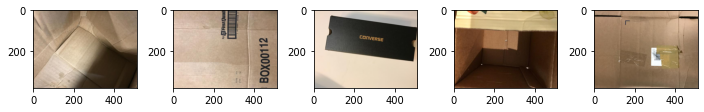

In [6]:
plot_imgs(data_path+'/cardboard')

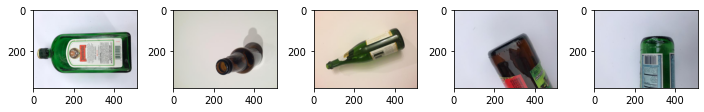

In [7]:
plot_imgs(data_path+'/glass')

In [ ]:
plot_imgs(data_path+'/paper')

In [ ]:
plot_imgs(data_path+'/plastic')

In [ ]:
plot_imgs(data_path+'/metal')

In [ ]:
plot_imgs(data_path+'/trash')

In [ ]:
batch_size = 32

In [ ]:
train=ImageDataGenerator(horizontal_flip=True, vertical_flip=True,validation_split=0.1,rescale=1./255,
                         shear_range = 0.1,zoom_range = 0.1,
                         width_shift_range = 0.1,
                         height_shift_range = 0.1,)

test=ImageDataGenerator(rescale=1./255,validation_split=0.1)

train_generator=train.flow_from_directory(data_path,target_size=(300,300),batch_size=batch_size,class_mode='categorical',subset='training')

test_generator=test.flow_from_directory(data_path,target_size=(300,300),batch_size=batch_size,class_mode='categorical',subset='validation')

In [14]:
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
print(labels)

{0: 'cardboard', 1: 'glass', 2: 'metal', 3: 'paper', 4: 'plastic', 5: 'trash'}


In [15]:
num_classes = 6

In [16]:
model = Sequential()
   
model.add(Conv2D(32,(3,3), padding='same', input_shape=(300,300,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2))) 
model.add(Conv2D(64,(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2))) 
model.add(Conv2D(32,(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2))) 
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 300, 300, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 150, 150, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 150, 150, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 32)        18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 43808)             0

In [17]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
model_path="gdrive/My Drive/ml/garclass.h5"
checkpoint1 = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint1]

In [19]:
num_epochs = 100
step_size_train=train_generator.n//train_generator.batch_size
step_size_test =test_generator.n//test_generator.batch_size

In [ ]:
history = model.fit_generator(train_generator, epochs=num_epochs, steps_per_epoch=step_size_train,validation_data=test_generator,
                    validation_steps=step_size_test,callbacks=callbacks_list)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
49/49 [==============================] - ETA: 0s - loss: 1.7537 - accuracy: 0.2350
Epoch 00001: val_accuracy improved from -inf to 0.38750, saving model to gdrive/My Drive/ml/garclass.h5
49/49 [==============================] - 41s 832ms/step - loss: 1.7537 - accuracy: 0.2350 - val_loss: 1.5907 - val_accuracy: 0.3875
Epoch 2/100
49/49 [==============================] - ETA: 0s - loss: 1.5986 - accuracy: 0.3163
Epoch 00002: val_accuracy did not improve from 0.38750
49/49 [==============================] - 41s 831ms/step - loss: 1.5986 - accuracy: 0.3163 - val_loss: 1.4838 - val_accuracy: 0.3875
Epoch 3/100
49/49 [==============================] - ETA: 0s - loss: 1.5027 - accuracy: 0.3585
Epoch 00003: val_accuracy did not improve from 0.38750
49/49 [==============================] - 40s 825ms/step - loss: 1.5027 - accuracy: 0.3585 - val_loss: 1.4093 - val_accuracy: 0.3875
Epoch 4/100
49/49 [==========

In [ ]:
# Evaluate Model
score = model.evaluate_generator(test_generator, steps=step_size_test)
print(score)

In [ ]:
model.save("gdrive/My Drive/ml/garclass.h5")
